In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
# Carregar los datosc simulados
file_path = Path('../data/processed/processed_data.json')
if file_path.exists():
    with open('../data/processed/processed_data.json') as f:
        data = [json.loads(line) for line in f]
else:
    print(file_path.resolve())


In [2]:
df = pl.DataFrame(data)
print(df.head())

shape: (5, 8)
┌────────────┬───────────┬───────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ timestamp  ┆ cpu_usage ┆ ram_usage ┆ disk_usage ┆ temperatur ┆ network_l ┆ error_cod ┆ timestamp │
│ ---        ┆ ---       ┆ ---       ┆ ---        ┆ e          ┆ atency    ┆ e         ┆ _parsed   │
│ str        ┆ f64       ┆ f64       ┆ f64        ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆           ┆           ┆            ┆ f64        ┆ f64       ┆ str       ┆ str       │
╞════════════╪═══════════╪═══════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2025-04-16 ┆ 40.93     ┆ 46.14     ┆ 53.9       ┆ 31.29      ┆ 128.85    ┆ OK        ┆ 2025-04-1 │
│ T15:26:28. ┆           ┆           ┆            ┆            ┆           ┆           ┆ 6T15:26:2 │
│ 663236     ┆           ┆           ┆            ┆            ┆           ┆           ┆ 8.663236  │
│ 2025-04-16 ┆ 78.92     ┆ 37.04     ┆ 40.69      ┆ 72.89      ┆ 127.04    ┆ 

In [3]:
# Descripcion  estadistica basica
print(df.select([
    pl.col("cpu_usage").mean().alias("CPU mitjana"),
    pl.col("ram_usage").mean().alias("RAM mitjana"),
    pl.col("temperature").max().alias("Temperatura màxima"),
    pl.col("network_latency").min().alias("Latència mínima")
]))


shape: (1, 4)
┌─────────────┬─────────────┬────────────────────┬─────────────────┐
│ CPU mitjana ┆ RAM mitjana ┆ Temperatura màxima ┆ Latència mínima │
│ ---         ┆ ---         ┆ ---                ┆ ---             │
│ f64         ┆ f64         ┆ f64                ┆ f64             │
╞═════════════╪═════════════╪════════════════════╪═════════════════╡
│ 52.8425     ┆ 55.740833   ┆ 84.77              ┆ 23.95           │
└─────────────┴─────────────┴────────────────────┴─────────────────┘


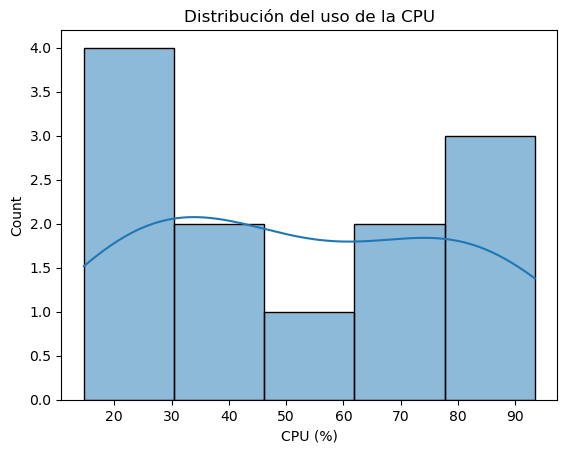

In [7]:
# Convertir a Pandas pera la visualitzacion con seaborn
pdf = df.to_pandas()

# Grafico de distribucion de CPU
sns.histplot(pdf["cpu_usage"], kde=True)
plt.title("Distribución del uso de la CPU")
plt.xlabel("CPU (%)")
plt.show()

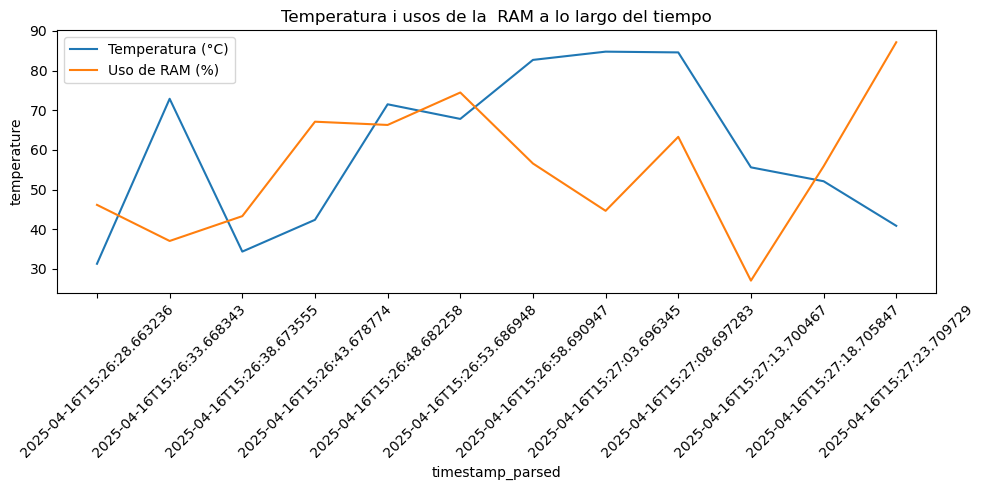

In [6]:
# Grafico de lineas para la temperatura i uso de la RAM
plt.figure(figsize=(10, 5))
sns.lineplot(x="timestamp_parsed", y="temperature", data=pdf, label="Temperatura (°C)")
sns.lineplot(x="timestamp_parsed", y="ram_usage", data=pdf, label="Uso de RAM (%)")
plt.xticks(rotation=45)
plt.title("Temperatura i usos de la  RAM a lo largo del tiempo")
plt.legend()
plt.tight_layout()
plt.show()

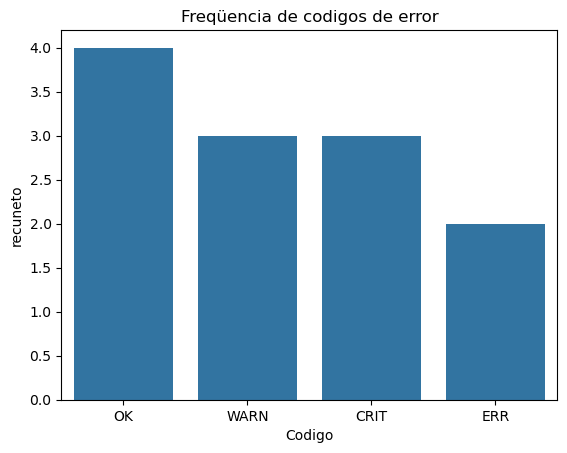

In [8]:
# contage para codi d'error
sns.countplot(x="error_code", data=pdf)
plt.title("Freqüencia de codigos de error")
plt.xlabel("Codigo")
plt.ylabel("recuneto")
plt.show()